In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data_dir = "Data/train/"
validation_data_dir = "Data/test/"


In [3]:
# Image data preprocessing
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(48, 48),
					batch_size=32,
					class_mode='categorical',
					shuffle=True)

Found 28709 images belonging to 7 classes.


In [5]:
validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(48, 48),
							batch_size=32,
							class_mode='categorical',
							shuffle=True)

Found 7178 images belonging to 7 classes.


In [6]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [7]:
img, label = train_generator.__next__()

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [9]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [11]:
train_path = "Data/train/"
test_path = "Data/test/"

In [12]:
import os
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [13]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


In [14]:
print(num_train_imgs)
print(num_test_imgs)

28709
7178


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()
# Add layers to the model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Update to 7 units for 7 classes

epochs = 30

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                   steps_per_epoch=num_train_imgs//32,
                   epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=num_test_imgs//32)


Epoch 1/30


897/897 [==============================] - 59s 64ms/step - loss: 1.7803 - accuracy: 0.2654 - val_loss: 1.6930 - val_accuracy: 0.3199
Epoch 2/30
897/897 [==============================] - 45s 50ms/step - loss: 1.6668 - accuracy: 0.3326 - val_loss: 1.5170 - val_accuracy: 0.4114
Epoch 3/30
897/897 [==============================] - 45s 50ms/step - loss: 1.5451 - accuracy: 0.3989 - val_loss: 1.4325 - val_accuracy: 0.4393
Epoch 4/30
897/897 [==============================] - 46s 52ms/step - loss: 1.4700 - accuracy: 0.4299 - val_loss: 1.3441 - val_accuracy: 0.4838
Epoch 5/30
897/897 [==============================] - 43s 47ms/step - loss: 1.4131 - accuracy: 0.4543 - val_loss: 1.3216 - val_accuracy: 0.4961
Epoch 6/30
897/897 [==============================] - 44s 49ms/step - loss: 1.3742 - accuracy: 0.4728 - val_loss: 1.2684 - val_accuracy: 0.5119
Epoch 7/30
897/897 [==============================] - 40s 44ms/step - loss: 1.3454 - accuracy: 0.4827 - val_loss: 1.2756 - val_accurac

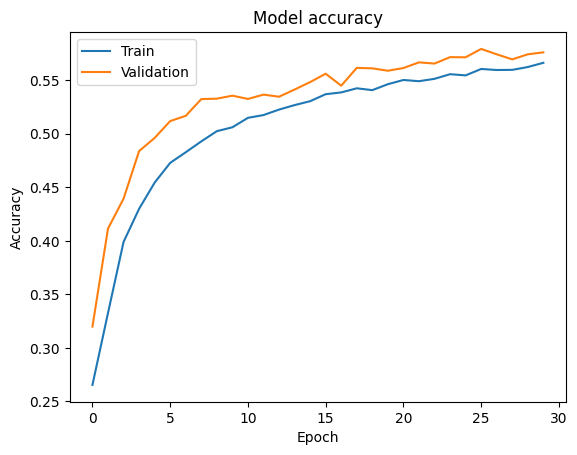

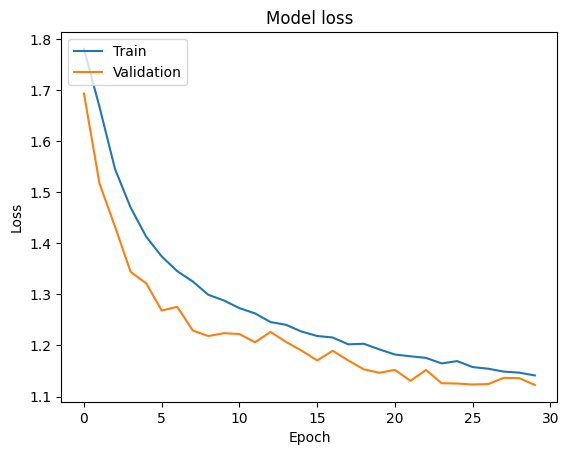

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [17]:
model.save('model_file_30epochs.h5')

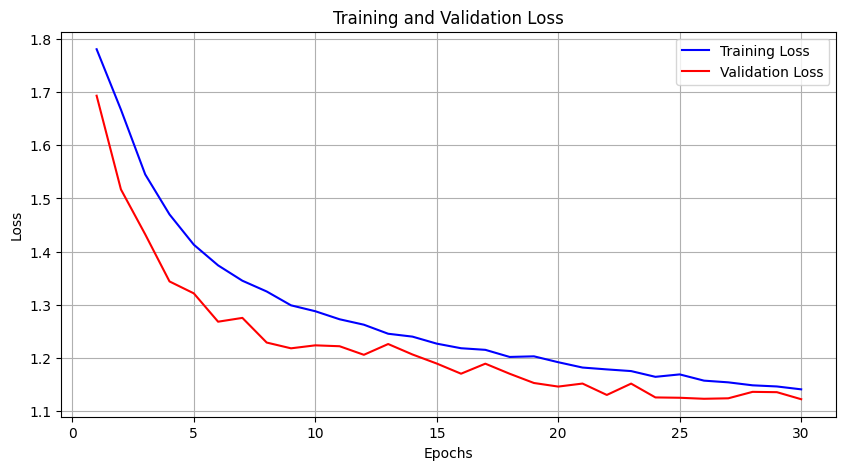

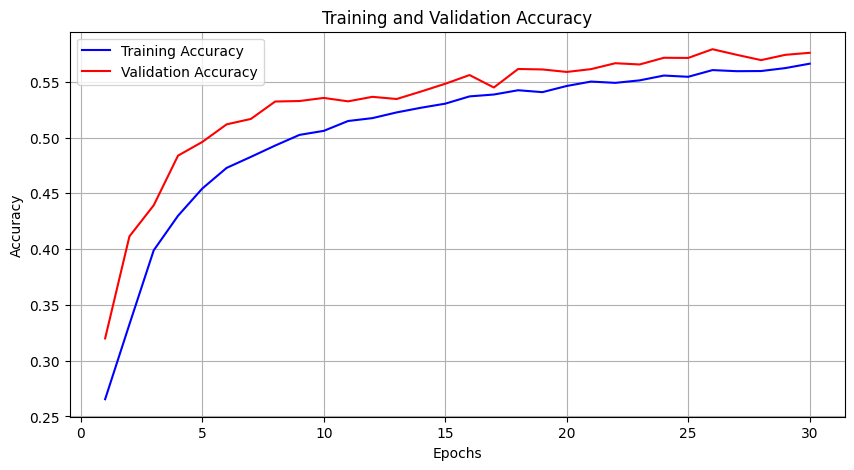

In [18]:
import matplotlib.pyplot as plt

# Extracting training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


225/225 [==============================] - 5s 24ms/step


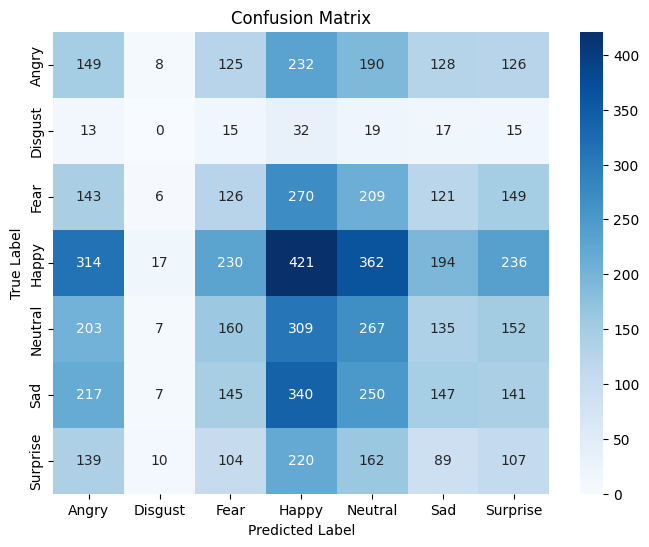

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predicted labels and true labels
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


225/225 [==============================] - 5s 24ms/step


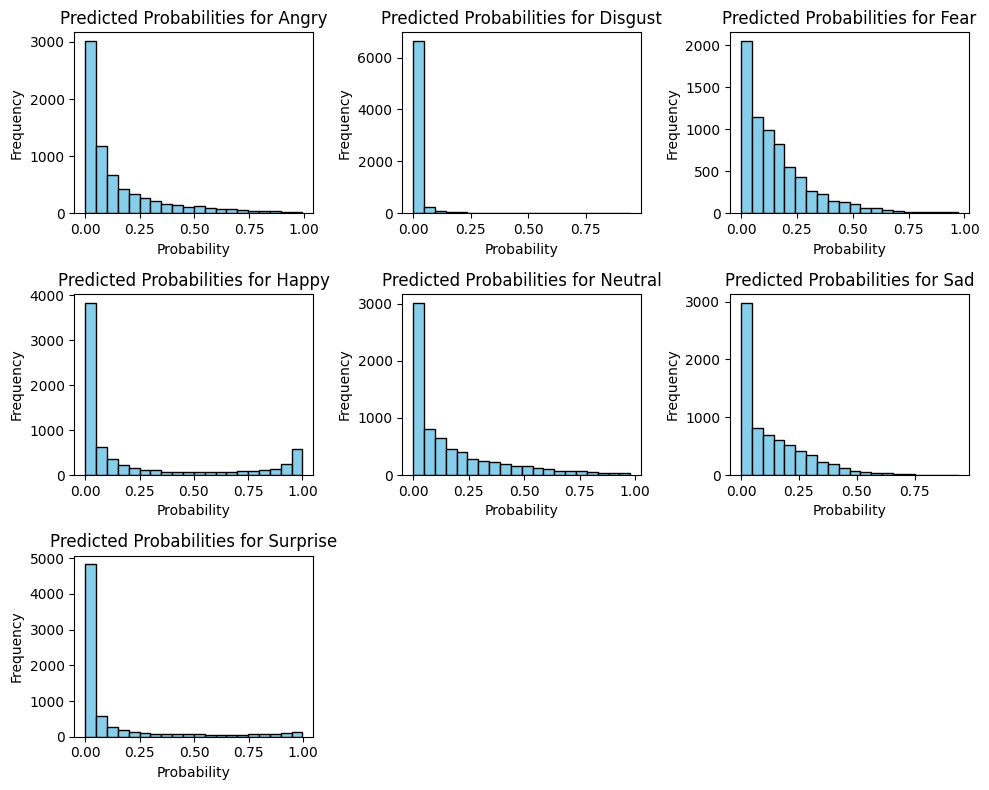

In [21]:
# Get predicted probabilities for each class
predicted_probabilities = model.predict(validation_generator)

# Plot histograms of predicted probabilities for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.subplot(3, 3, i+1)
    plt.hist(predicted_probabilities[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Predicted Probabilities for {class_labels[i]}')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


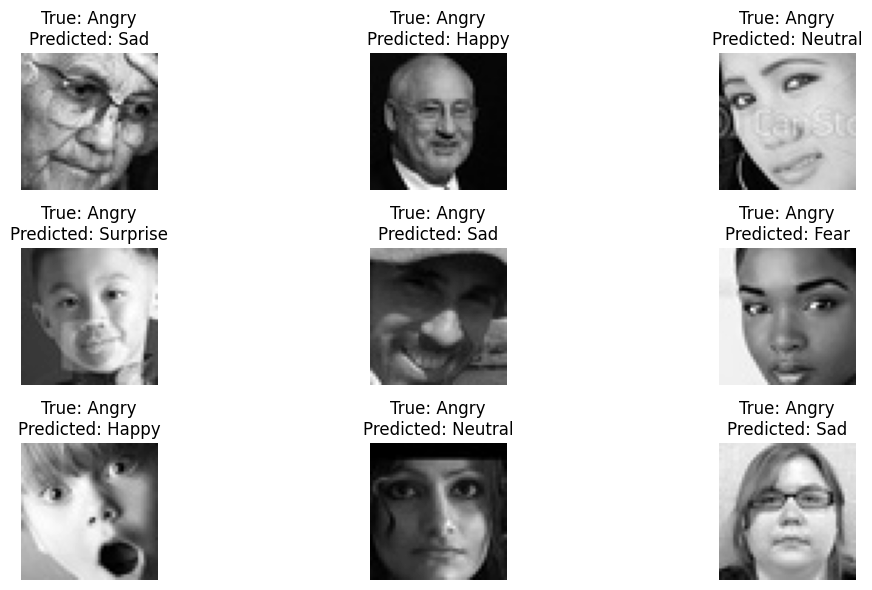

In [22]:
# Get indices of misclassified samples
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Plot misclassified samples
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(validation_generator[idx][0][0], cmap='gray')
    plt.title(f'True: {class_labels[y_true[idx]]}\nPredicted: {class_labels[y_pred_classes[idx]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


225/225 [==============================] - 5s 24ms/step


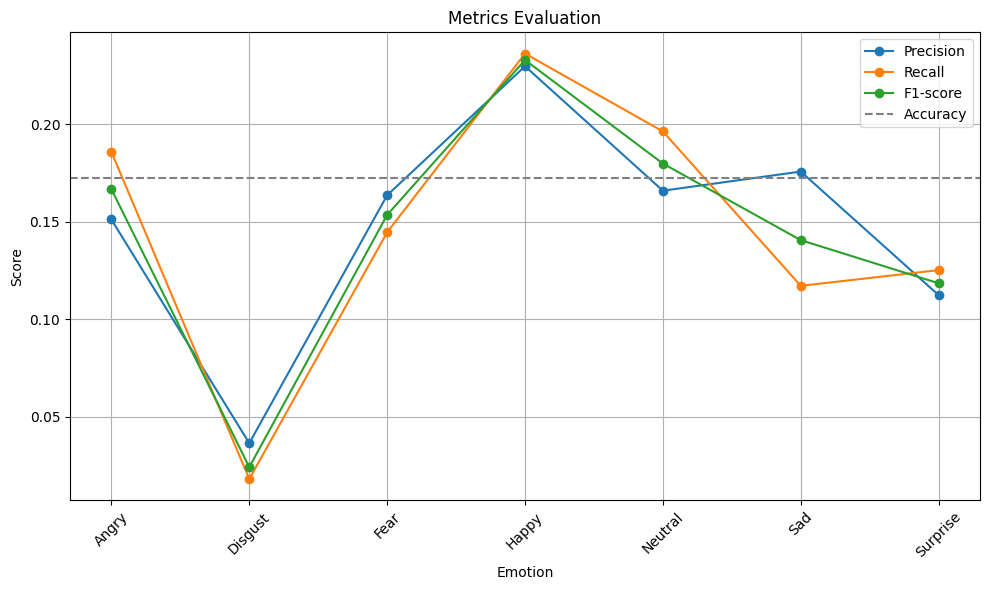

In [23]:
from sklearn.metrics import classification_report

# Get predictions on validation data
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)

# Extract metrics
accuracy = report['accuracy']
precision = [report[label]['precision'] for label in class_labels]
recall = [report[label]['recall'] for label in class_labels]
f1_score = [report[label]['f1-score'] for label in class_labels]

# Plot metrics
plt.figure(figsize=(10, 6))

plt.plot(class_labels, precision, marker='o', label='Precision')
plt.plot(class_labels, recall, marker='o', label='Recall')
plt.plot(class_labels, f1_score, marker='o', label='F1-score')
plt.axhline(y=accuracy, color='gray', linestyle='--', label='Accuracy')

plt.title('Metrics Evaluation')
plt.xlabel('Emotion')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


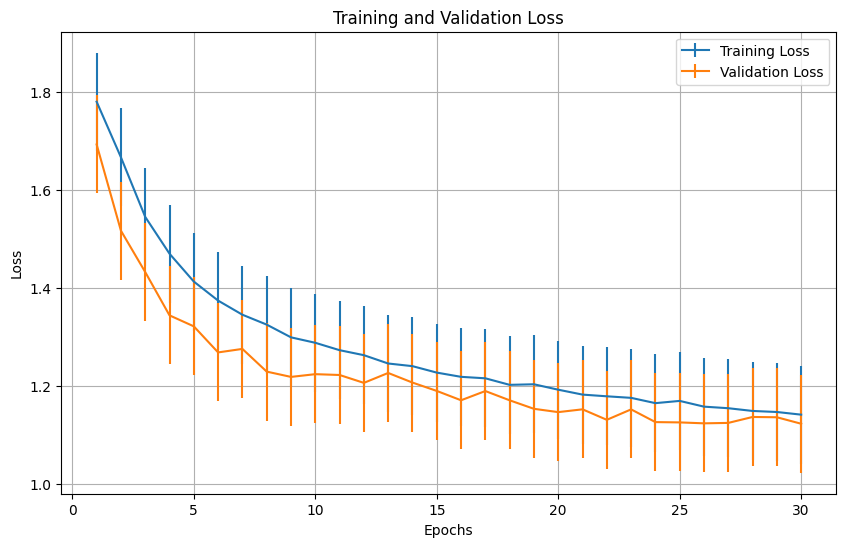

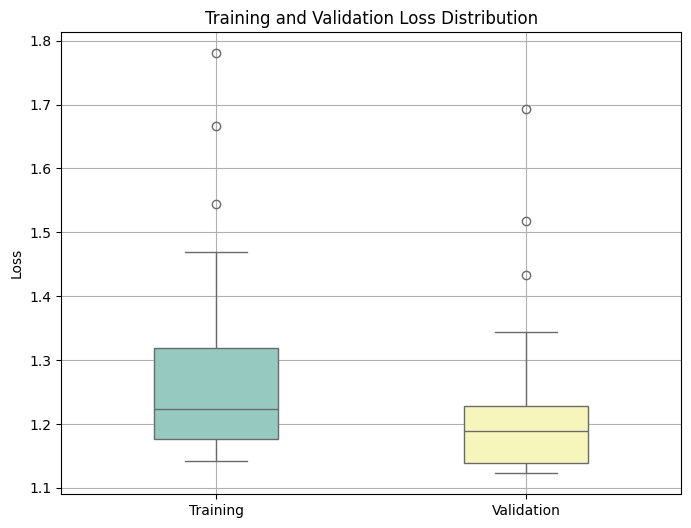

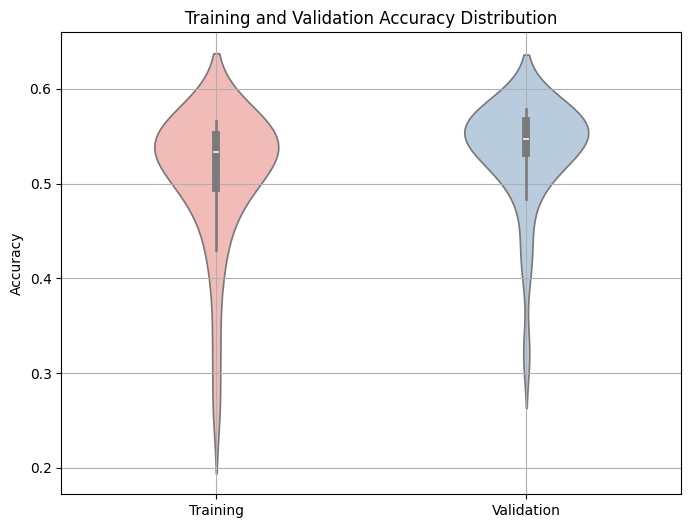

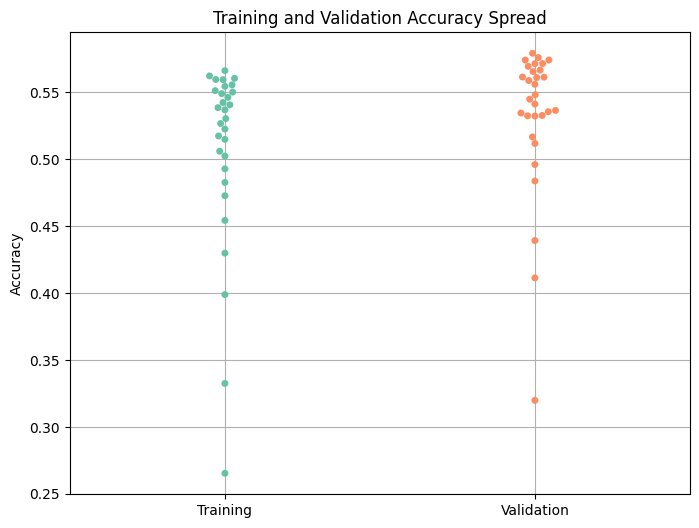

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual data)
epochs = range(1, 31)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Line plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(epochs, train_loss, yerr=0.1, label='Training Loss')
plt.errorbar(epochs, val_loss, yerr=0.1, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=[train_loss, val_loss], width=0.4, palette="Set3")
plt.title('Training and Validation Loss Distribution')
plt.ylabel('Loss')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.grid(True)
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=[train_acc, val_acc], width=0.4, palette="Pastel1")
plt.title('Training and Validation Accuracy Distribution')
plt.ylabel('Accuracy')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.grid(True)
plt.show()

# Swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(data=[train_acc, val_acc], size=5, palette="Set2")
plt.title('Training and Validation Accuracy Spread')
plt.ylabel('Accuracy')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.grid(True)
plt.show()


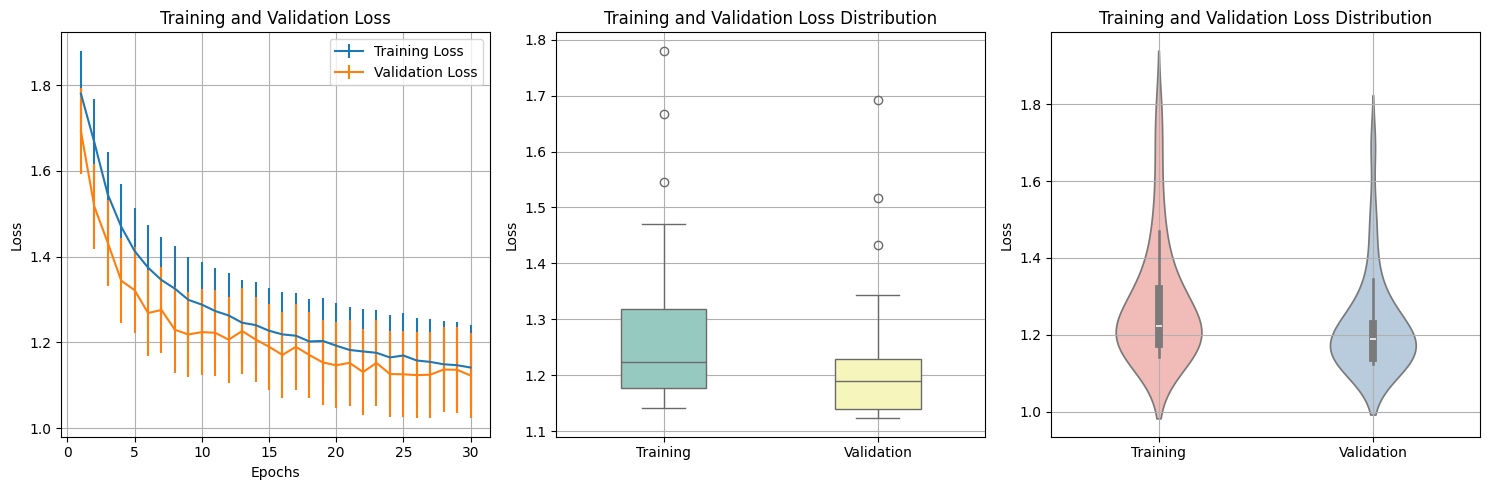

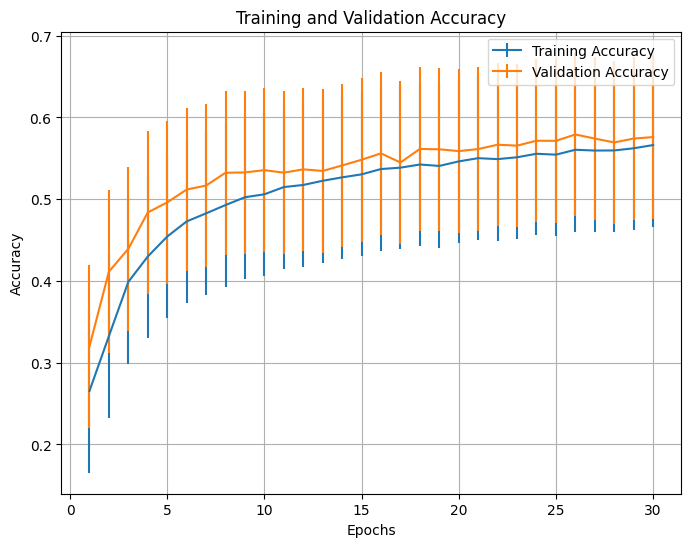

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual data)
epochs = range(1, 31)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training performance
plt.figure(figsize=(15, 5))

# Line plot with error bars
plt.subplot(1, 3, 1)
plt.errorbar(epochs, train_loss, yerr=0.1, label='Training Loss')
plt.errorbar(epochs, val_loss, yerr=0.1, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=[train_loss, val_loss], width=0.4, palette="Set3")
plt.title('Training and Validation Loss Distribution')
plt.ylabel('Loss')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.grid(True)

# Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(data=[train_loss, val_loss], width=0.4, palette="Pastel1")
plt.title('Training and Validation Loss Distribution')
plt.ylabel('Loss')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting validation performance
plt.figure(figsize=(8, 6))

# Line plot with error bars
plt.errorbar(epochs, train_acc, yerr=0.1, label='Training Accuracy')
plt.errorbar(epochs, val_acc, yerr=0.1, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


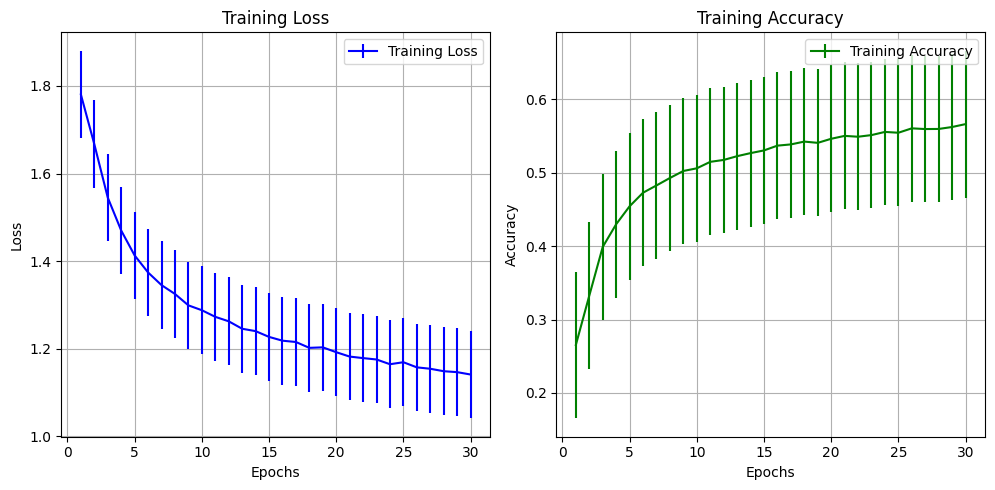

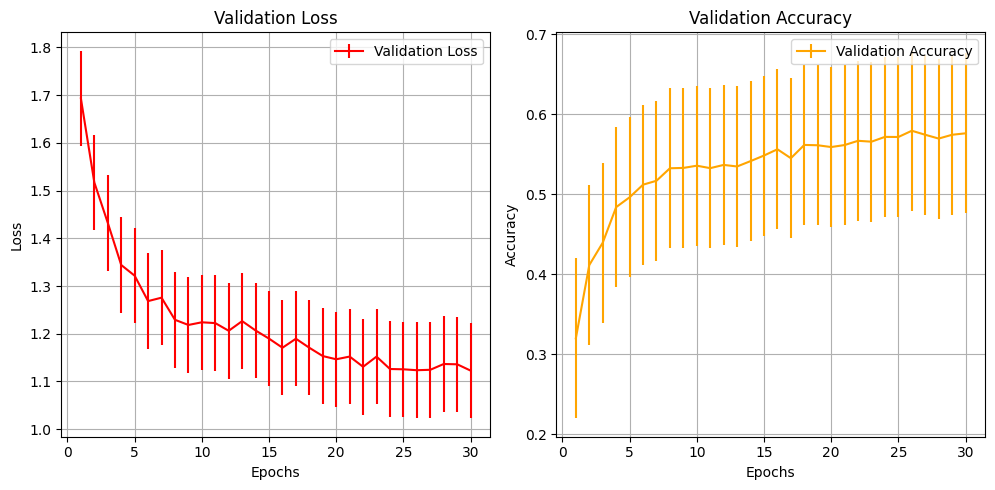

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual data)
epochs = range(1, 31)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training performance
plt.figure(figsize=(15, 5))

# Training Loss
plt.subplot(1, 3, 1)
plt.errorbar(epochs, train_loss, yerr=0.1, label='Training Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Training Accuracy
plt.subplot(1, 3, 2)
plt.errorbar(epochs, train_acc, yerr=0.1, label='Training Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

# Plotting validation performance
plt.figure(figsize=(15, 5))

# Validation Loss
plt.subplot(1, 3, 1)
plt.errorbar(epochs, val_loss, yerr=0.1, label='Validation Loss', color='red')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Validation Accuracy
plt.subplot(1, 3, 2)
plt.errorbar(epochs, val_acc, yerr=0.1, label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


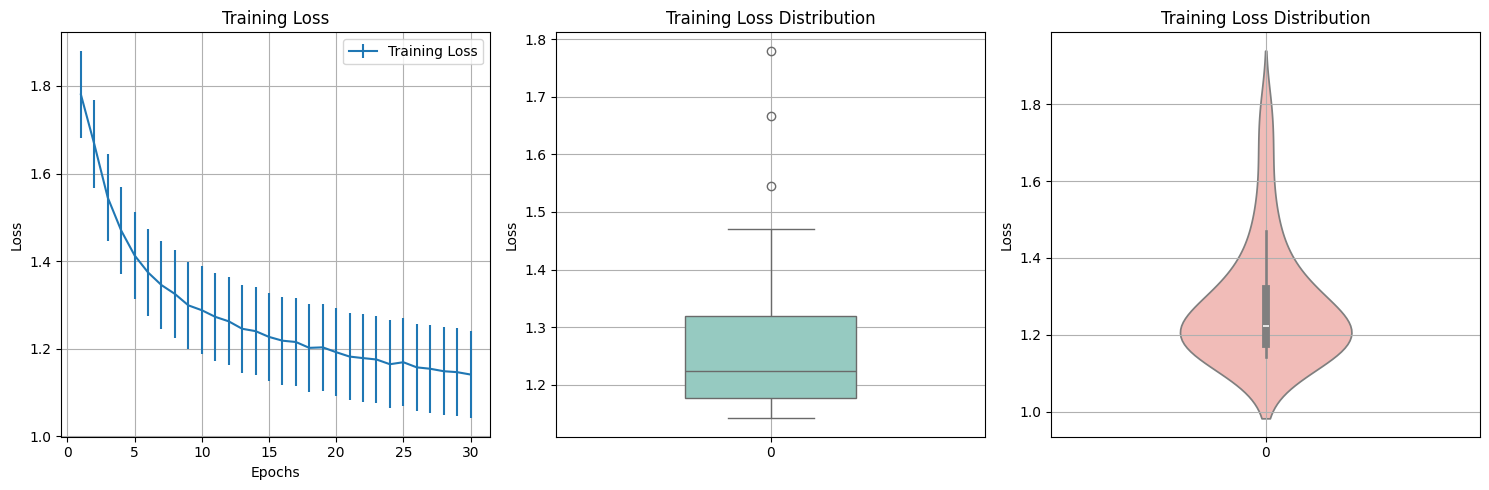

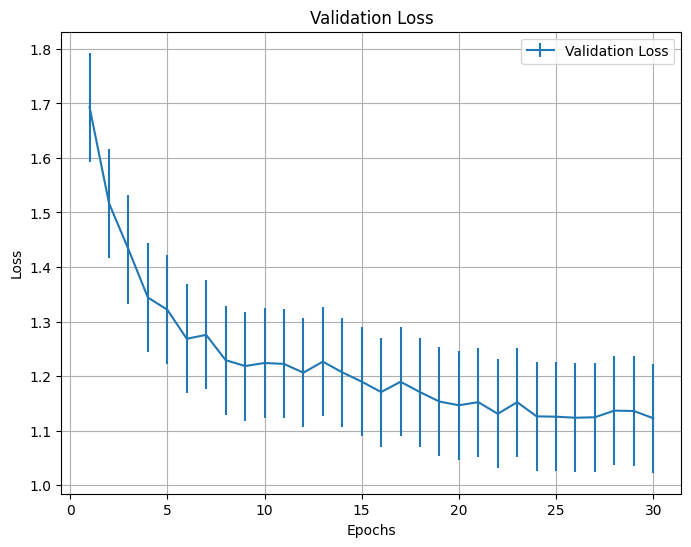

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual data)
epochs = range(1, 31)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training performance
plt.figure(figsize=(15, 5))

# Line plot with error bars
plt.subplot(1, 3, 1)
plt.errorbar(epochs, train_loss, yerr=0.1, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=[train_loss], width=0.4, palette="Set3")
plt.title('Training Loss Distribution')
plt.ylabel('Loss')
plt.grid(True)

# Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(data=[train_loss], width=0.4, palette="Pastel1")
plt.title('Training Loss Distribution')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting validation performance
plt.figure(figsize=(8, 6))

# Line plot with error bars
plt.errorbar(epochs, val_loss, yerr=0.1, label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
